# Install Packages

In [ ]:
!pip install rdkit-pypi chembl_webresource_client pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.1 MB/s eta 0:00:00


# SMILE Comparison

**Drug Fingerprint Similarity Calculation
Libraries Used: rdkit, pandas**

Steps:

Load SMILES strings from drugs CSV.

Generate Morgan fingerprints (circular fingerprints) for each reference molecule and each molecule in the dataset.

Compute Tanimoto similarity between each candidate molecule and the reference molecules.

Rank all molecules based on the average similarity score across the three references.

Save the sorted list to a CSV (sorted_molecules2.csv).

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from chembl_webresource_client.new_client import new_client

# Load your CSV file
df = pd.read_csv('/content/drive/MyDrive/drug_information.csv')

# Ensure the CSV contains a column named 'smiles'
if 'smiles' not in df.columns:
    raise ValueError("CSV must contain a column named 'smiles'")

# Corrected reference molecules SMILES
reference_smiles = {
    'Everolimus': 'CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(=O)N2CCCC[C@H]2C(=O)O[C@H]([C@H](C)C[C@@H]2CC[C@@H](OCCO)[C@H](OC)C2)CC(=O)[C@H](C)/C=C(\\C)[C@@H](O)[C@@H](OC)C(=O)[C@H](C)C[C@H](C)/C=C/C=C/C=C/1C',
    'Aspirin': 'CC(=O)Oc1ccccc1C(=O)O',
    'Troglitazone': 'Cc1c(C)c2c(c(C)c1O)CCC(C)(COc1ccc(CC3SC(=O)NC3=O)cc1)O2'
}

# Calculate fingerprints for reference molecules
reference_fps = {name: AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smiles), 2)
                 for name, smiles in reference_smiles.items()}

# Compute fingerprints for molecules in the file
df['smiles'] = df['smiles'].fillna('').astype(str)

def compute_fp(smile):
    mol = Chem.MolFromSmiles(smile)
    if mol:
        return AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    else:
        return None

df['Fingerprint'] = df['smiles'].apply(compute_fp)

# Function to calculate similarity scores
def similarity_to_refs(fp, refs):
    if fp is None:
        return {name: 0 for name in refs}
    return {name: DataStructs.TanimotoSimilarity(fp, ref_fp) for name, ref_fp in refs.items()}

# Calculate similarity
similarities = df['Fingerprint'].apply(lambda x: similarity_to_refs(x, reference_fps))
similarity_df = pd.json_normalize(similarities)
df = pd.concat([df, similarity_df], axis=1)

# Rank molecules based on average similarity to references
df['Avg_Similarity'] = df[list(reference_smiles.keys())].mean(axis=1)
df_sorted = df.sort_values(by='Avg_Similarity', ascending=False)

# Save sorted results
sorted_results_path = '/content/drive/MyDrive/sorted_molecules2.csv'
df_sorted.to_csv(sorted_results_path, index=False)
print(f'Sorted molecules saved to {sorted_results_path}')

# Querying ChEMBL for similar molecules
similarity = new_client.similarity
chembl_results = []

for name, smiles in reference_smiles.items():
    similar_molecules = similarity.filter(smiles=smiles, similarity=70).only(['molecule_chembl_id', 'canonical_smiles', 'similarity'])
    for molecule in similar_molecules:
        molecule['Reference'] = name
        chembl_results.append(molecule)

chembl_df = pd.DataFrame(chembl_results)
chembl_results_path = '/content/drive/MyDrive/chembl_similar_molecules2.csv'
chembl_df.to_csv(chembl_results_path, index=False)
print(f'ChEMBL similar molecules saved to {chembl_results_path}')



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found

Sorted molecules saved to /content/drive/MyDrive/sorted_molecules2.csv
ChEMBL similar molecules saved to /content/drive/MyDrive/chembl_similar_molecules2.csv


# Avg. Similarity of Neural Network Drugs

Top 10 Molecules based on Average Similarity:
                                              smiles  Everolimus   Aspirin  \
0                              CC(=O)Oc1ccccc1C(=O)O    0.068966  1.000000   
1                      O=C(Oc1ccccc1C(=O)O)c1ccccc1O    0.043478  0.593750   
2             CC(=O)Nc1ccc(OC(=O)c2ccccc2OC(C)=O)cc1    0.061224  0.512821   
3            CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1    0.114286  0.142857   
4            CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1    0.106796  0.131148   
5         CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1.Cl    0.105769  0.129032   
6  CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1.O=C(O)...    0.117117  0.161765   
7                  CC(=O)Oc1cc(C)c(OC(C)=O)c2ccccc12    0.065217  0.432432   
8  CC(=O)Oc1cccc2c1C(=O)c1c(OC(C)=O)cc(C(=O)O)cc1...    0.070707  0.418605   
9         CC(=O)Oc1ccccc1C(=O)Nc1ncc([N+](=O)[O-])s1    0.066038  0.416667   

   Troglitazone  Avg_Similarity  
0      0.112676        0.393881  
1      0.108108        0.24

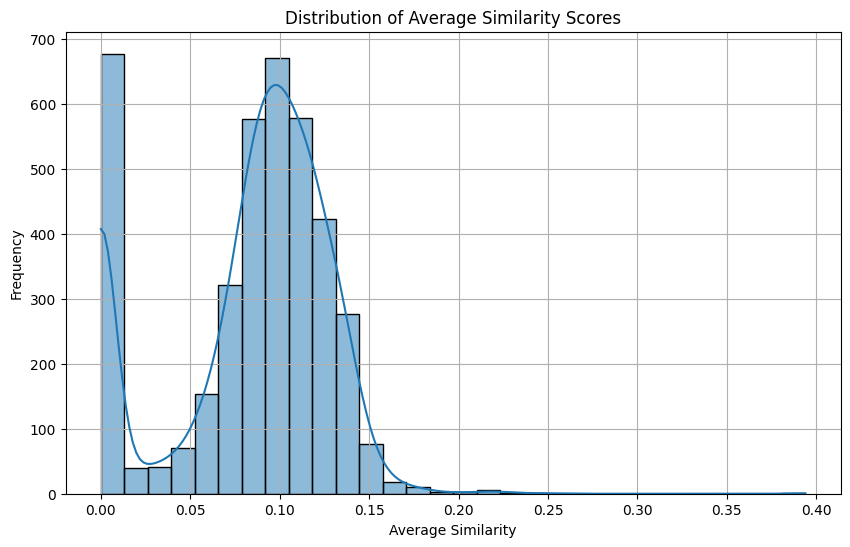

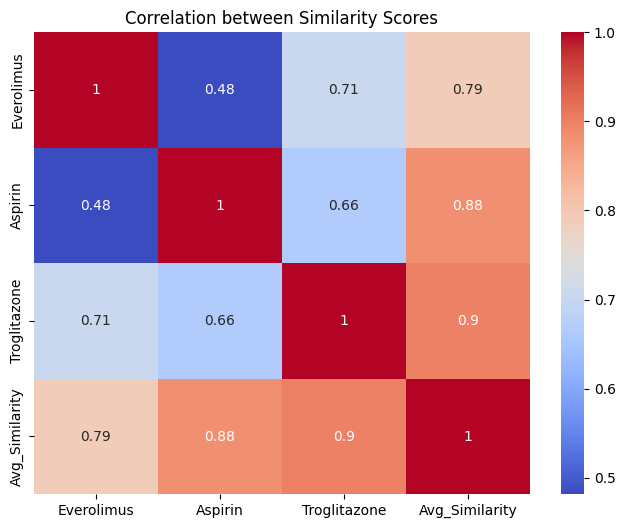


Molecules with high similarity (> 0.8):
                  smiles  Everolimus  Aspirin  Troglitazone  Avg_Similarity
0  CC(=O)Oc1ccccc1C(=O)O    0.068966      1.0      0.112676        0.393881


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the results
results_path = '/content/drive/MyDrive/sorted_molecules.csv'
df_results = pd.read_csv(results_path)

# Display top 10 molecules based on Avg_Similarity
print("Top 10 Molecules based on Average Similarity:")
print(df_results[['smiles', 'Everolimus', 'Aspirin', 'Troglitazone', 'Avg_Similarity']].head(10))

# Plot distribution of Average Similarity scores
plt.figure(figsize=(10, 6))
sns.histplot(df_results['Avg_Similarity'], kde=True, bins=30)
plt.title('Distribution of Average Similarity Scores')
plt.xlabel('Average Similarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the correlation heatmap between similarity scores
plt.figure(figsize=(8, 6))
sns.heatmap(df_results[['Everolimus', 'Aspirin', 'Troglitazone', 'Avg_Similarity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Similarity Scores')
plt.show()

# Identify and display molecules highly similar (>0.8) to any reference molecule
threshold = 0.8
highly_similar = df_results[(df_results['Everolimus'] > threshold) | (df_results['Aspirin'] > threshold) | (df_results['Troglitazone'] > threshold)]
print(f"\nMolecules with high similarity (> {threshold}):")
print(highly_similar[['smiles', 'Everolimus', 'Aspirin', 'Troglitazone', 'Avg_Similarity']])

# Avg. Similarity in Chembl Search

Top 10 ChEMBL molecules based on Similarity:
  molecule_chembl_id  similarity Reference
0      CHEMBL2296002  100.000000   Aspirin
1      CHEMBL1697753  100.000000   Aspirin
2           CHEMBL25  100.000000   Aspirin
3      CHEMBL3833404   88.888890   Aspirin
4      CHEMBL3833325   88.888890   Aspirin
5       CHEMBL350343   85.714287   Aspirin
6      CHEMBL5282669   74.074072   Aspirin
7      CHEMBL4515737   70.370370   Aspirin
8      CHEMBL1451173   69.999999   Aspirin


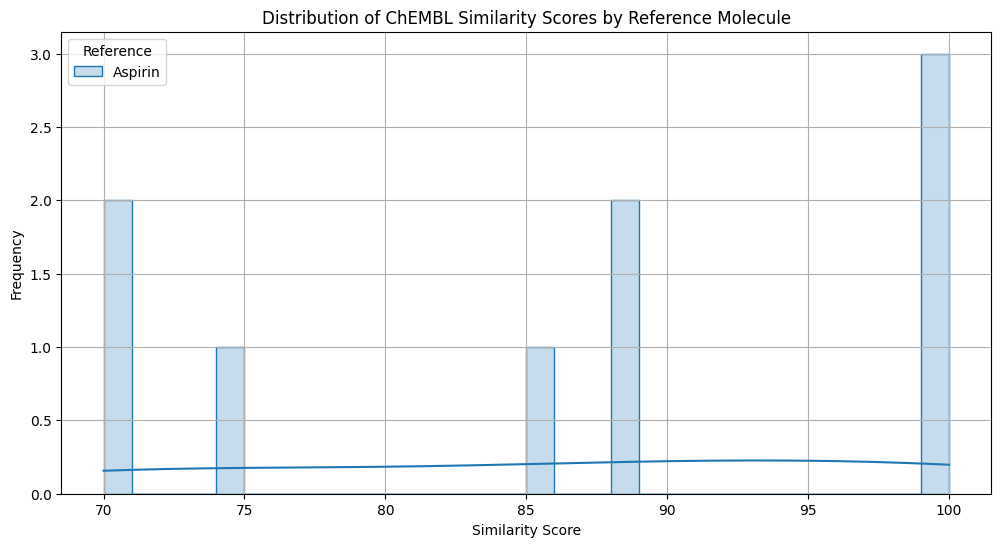


ChEMBL molecules with high similarity (> 0.85):
  molecule_chembl_id  similarity Reference
0      CHEMBL2296002  100.000000   Aspirin
1      CHEMBL1697753  100.000000   Aspirin
2           CHEMBL25  100.000000   Aspirin
3      CHEMBL3833404   88.888890   Aspirin
4      CHEMBL3833325   88.888890   Aspirin
5       CHEMBL350343   85.714287   Aspirin
6      CHEMBL5282669   74.074072   Aspirin
7      CHEMBL4515737   70.370370   Aspirin
8      CHEMBL1451173   69.999999   Aspirin


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the ChEMBL results
chembl_results_path = '/content/drive/MyDrive/chembl_similar_molecules.csv'
df_chembl = pd.read_csv(chembl_results_path)

# Display top 10 similar molecules
print("Top 10 ChEMBL molecules based on Similarity:")
print(df_chembl.sort_values(by='similarity', ascending=False).head(10))

# Plot distribution of similarity scores by Reference molecule
plt.figure(figsize=(12, 6))
sns.histplot(data=df_chembl, x='similarity', hue='Reference', bins=30, kde=True, element="step")
plt.title('Distribution of ChEMBL Similarity Scores by Reference Molecule')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Show molecules with high similarity (>0.85)
high_threshold = 0.85
highly_similar_chembl = df_chembl[df_chembl['similarity'] > high_threshold]

print(f"\nChEMBL molecules with high similarity (> {high_threshold}):")
print(highly_similar_chembl.sort_values(by='similarity', ascending=False))

# CurPocket Data Import and Analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Amino Acid Frequencies Across Files:
   CurPockets_info (5).txt  CurPockets_info (4).txt  CurPockets_info (6).txt  \
S                        9                       11                       14   
V                        5                        7                        9   
R                        4                        8                        7   
P                        8                       11                        7   
G                       10                       11                       11   
W                        5                        6                        5   
D                        7                        9                       11   
M                        1                        4                        0   
T                       10                       12                       18   
F                        6        

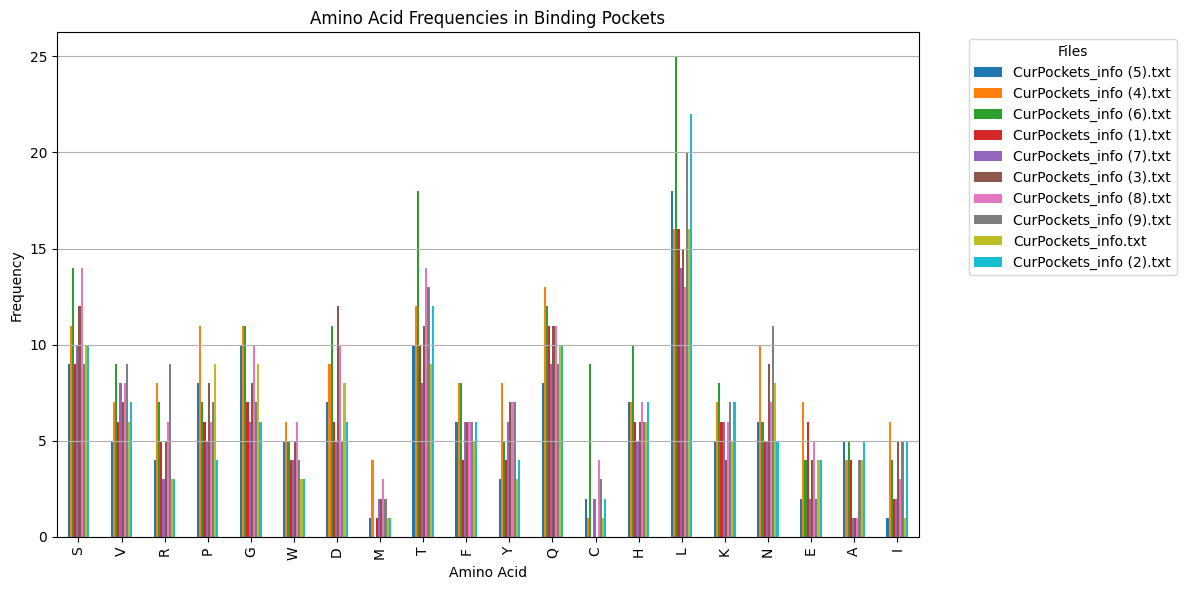


Binding Pocket Sizes (Cavities Volume):
       CurPockets_info (5).txt  CurPockets_info (4).txt  \
count                 5.000000                 5.000000   
mean                716.800000              2268.800000   
std                 526.747283              2929.980495   
min                 319.000000               626.000000   
25%                 396.000000               955.000000   
50%                 496.000000               957.000000   
75%                 763.000000              1314.000000   
max                1610.000000              7492.000000   

       CurPockets_info (6).txt  CurPockets_info (1).txt  \
count                 5.000000                 5.000000   
mean               1890.800000              1159.800000   
std                1685.295434               918.430019   
min                 456.000000               482.000000   
25%                1078.000000               739.000000   
50%                1247.000000               832.000000   
75%           

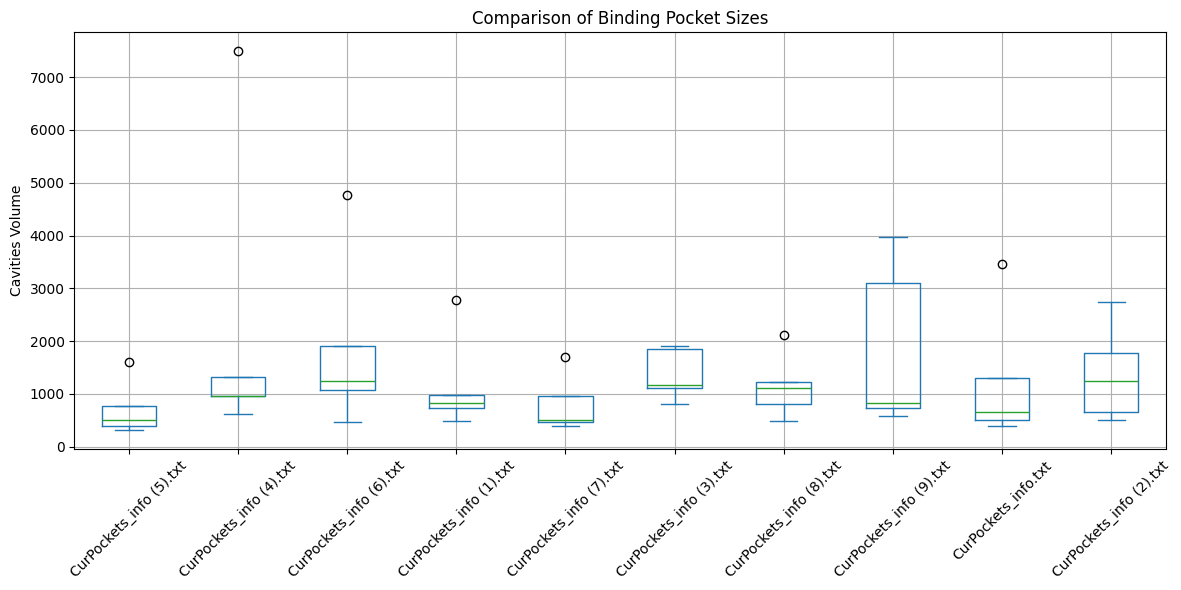

In [ ]:
import pandas as pd
import glob
import re
from collections import Counter
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the folder containing CurPocket files
folder_path = '/content/drive/MyDrive/CurPocket Data/'

# Get a list of all txt files in the folder
file_paths = glob.glob(folder_path + 'CurPockets_info*.txt')

# Function to parse each file
def parse_curpocket_file(file_path):
    pockets = []
    with open(file_path, 'r') as file:
        next(file)  # skip header line
        for line in file:
            parts = line.strip().split(maxsplit=8)
            if len(parts) == 9:
                pocket_info = {
                    'ID': int(parts[0]),
                    'Cavities_volume': int(parts[1]),
                    'center_x': float(parts[2]),
                    'center_y': float(parts[3]),
                    'center_z': float(parts[4]),
                    'size_x': int(parts[5]),
                    'size_y': int(parts[6]),
                    'size_z': int(parts[7]),
                    'contact_resi': parts[8].split(',')
                }
                pockets.append(pocket_info)
    return pockets

# Parse all files and store data
all_data = {}
for file_path in file_paths:
    file_name = file_path.split('/')[-1]
    pockets = parse_curpocket_file(file_path)
    all_data[file_name] = pockets

# Compare amino acids across files
amino_acid_counts = {}
for file_name, pockets in all_data.items():
    amino_acids = []
    for pocket in pockets:
        residues = [re.findall(r'\d+:([A-Z]):[A-Z]', res)[0] for res in pocket['contact_resi']]
        amino_acids.extend(residues)
    amino_acid_counts[file_name] = Counter(amino_acids)

# Create DataFrame for comparison
amino_acid_df = pd.DataFrame(amino_acid_counts).fillna(0).astype(int)
print("Amino Acid Frequencies Across Files:")
print(amino_acid_df)

# Plot amino acid distribution comparison
amino_acid_df.plot(kind='bar', figsize=(12, 6))
plt.title('Amino Acid Frequencies in Binding Pockets')
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.legend(title='Files', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Binding pocket size analysis
pocket_sizes = {}
for file_name, pockets in all_data.items():
    sizes = [pocket['Cavities_volume'] for pocket in pockets]
    pocket_sizes[file_name] = sizes

# Create DataFrame for pocket sizes
pocket_sizes_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in pocket_sizes.items()]))
print("\nBinding Pocket Sizes (Cavities Volume):")
print(pocket_sizes_df.describe())

# Boxplot for pocket size comparison
pocket_sizes_df.plot(kind='box', figsize=(12, 6))
plt.title('Comparison of Binding Pocket Sizes')
plt.ylabel('Cavities Volume')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CurPocket File Rename and Data Analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


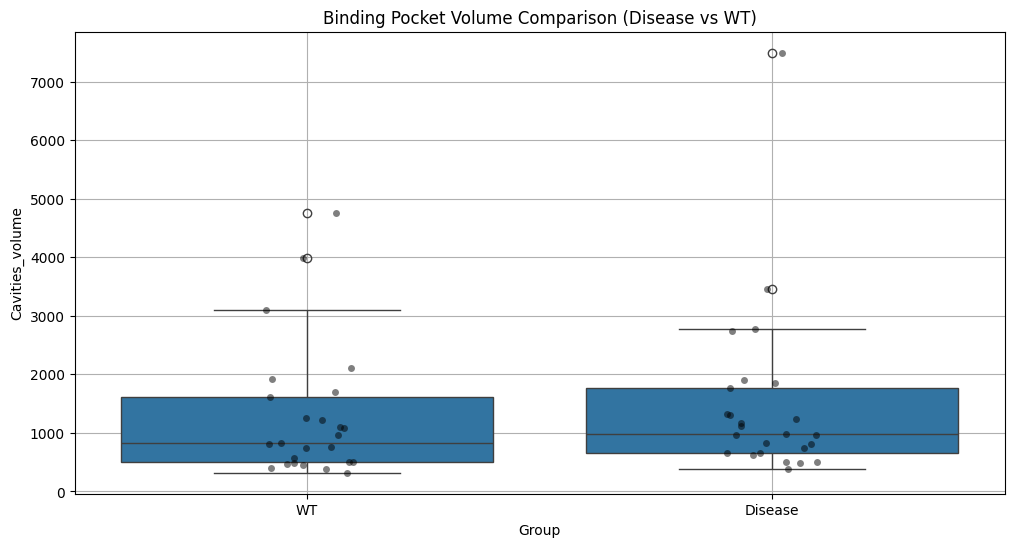

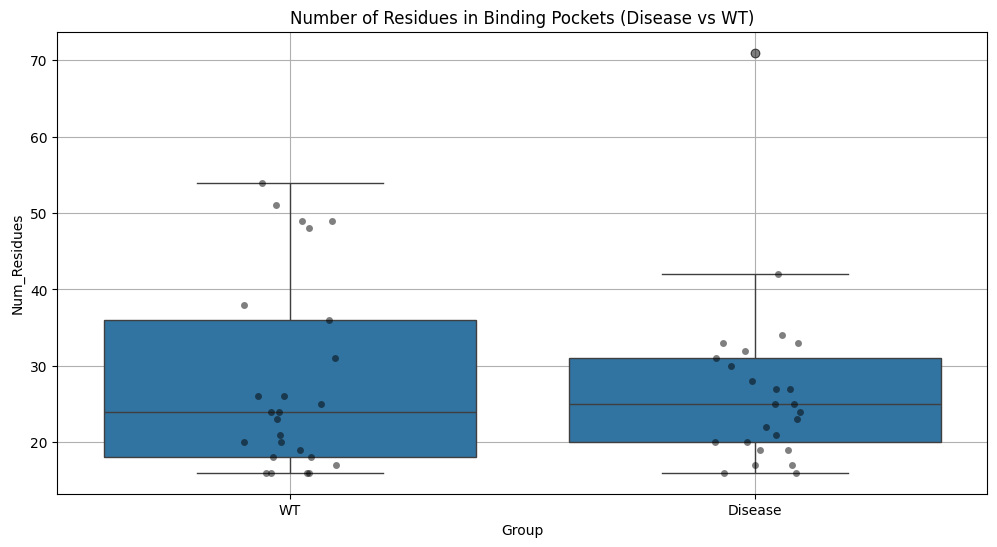

Statistical Analysis Results:
Pocket Volume Comparison (Disease vs WT): p-value = 0.5796
Number of Residues Comparison (Disease vs WT): p-value = 0.7354

Interpretation:
No significant difference in pocket volume between Disease and WT.
No significant difference in number of residues between Disease and WT.


In [ ]:
import os
import glob
import shutil
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define folder path
folder_path = '/content/drive/MyDrive/CurPocket Data/'

# Rename files based on your criteria
rename_mapping = {
    'CurPockets_info.txt': 'Disease_0.txt',
    'CurPockets_info (1).txt': 'Disease_1.txt',
    'CurPockets_info (2).txt': 'Disease_2.txt',
    'CurPockets_info (3).txt': 'Disease_3.txt',
    'CurPockets_info (4).txt': 'Disease_4.txt',
    'CurPockets_info (5).txt': 'WT_0.txt',
    'CurPockets_info (6).txt': 'WT_1.txt',
    'CurPockets_info (7).txt': 'WT_2.txt',
    'CurPockets_info (8).txt': 'WT_3.txt',
    'CurPockets_info (9).txt': 'WT_4.txt'
}

for old_name, new_name in rename_mapping.items():
    old_path = os.path.join(folder_path, old_name)
    new_path = os.path.join(folder_path, new_name)
    if os.path.exists(old_path):
        shutil.move(old_path, new_path)

# Function to parse files
def parse_curpocket(file_path, group, replicate):
    pockets = []
    with open(file_path, 'r') as file:
        next(file)
        for line in file:
            parts = line.strip().split(maxsplit=8)
            if len(parts) == 9:
                pockets.append({
                    'Group': group,
                    'Replicate': replicate,
                    'Pocket_ID': int(parts[0]),
                    'Cavities_volume': int(parts[1]),
                    'Num_Residues': len(parts[8].split(','))
                })
    return pockets

# Parse renamed files
parsed_data = []
for file_path in glob.glob(folder_path + '*.txt'):
    file_name = os.path.basename(file_path)
    match = re.match(r'(Disease|WT)_(\d+)\.txt', file_name)
    if match:
        group, replicate = match.groups()
        parsed_data.extend(parse_curpocket(file_path, group, int(replicate)))

df = pd.DataFrame(parsed_data)

# Visualization of Cavities_volume
plt.figure(figsize=(12, 6))
sns.boxplot(x='Group', y='Cavities_volume', data=df)
sns.stripplot(x='Group', y='Cavities_volume', data=df, color='black', alpha=0.5)
plt.title('Binding Pocket Volume Comparison (Disease vs WT)')
plt.grid(True)
plt.show()

# Visualization of number of residues
plt.figure(figsize=(12, 6))
sns.boxplot(x='Group', y='Num_Residues', data=df)
sns.stripplot(x='Group', y='Num_Residues', data=df, color='black', alpha=0.5)
plt.title('Number of Residues in Binding Pockets (Disease vs WT)')
plt.grid(True)
plt.show()

# Statistical Analysis: T-test between Disease and WT groups
volume_disease = df[df['Group'] == 'Disease']['Cavities_volume']
volume_wt = df[df['Group'] == 'WT']['Cavities_volume']

residues_disease = df[df['Group'] == 'Disease']['Num_Residues']
residues_wt = df[df['Group'] == 'WT']['Num_Residues']

# Perform t-tests
vol_ttest = ttest_ind(volume_disease, volume_wt, equal_var=False)
res_ttest = ttest_ind(residues_disease, residues_wt, equal_var=False)

# Print results
print('Statistical Analysis Results:')
print(f"Pocket Volume Comparison (Disease vs WT): p-value = {vol_ttest.pvalue:.4f}")
print(f"Number of Residues Comparison (Disease vs WT): p-value = {res_ttest.pvalue:.4f}")

# Interpret statistical significance
alpha = 0.05
print("\nInterpretation:")
if vol_ttest.pvalue < alpha:
    print("Significant difference in pocket volume between Disease and WT.")
else:
    print("No significant difference in pocket volume between Disease and WT.")

if res_ttest.pvalue < alpha:
    print("Significant difference in number of residues between Disease and WT.")
else:
    print("No significant difference in number of residues between Disease and WT.")

# Curpocket Data AA frequency plus statistical tests

<ipython-input-1-97fac2e2f0df>:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=grouped, x='AminoAcid', y='Count', hue='Group', ci='sd', estimator=np.mean, errorbar='sd')


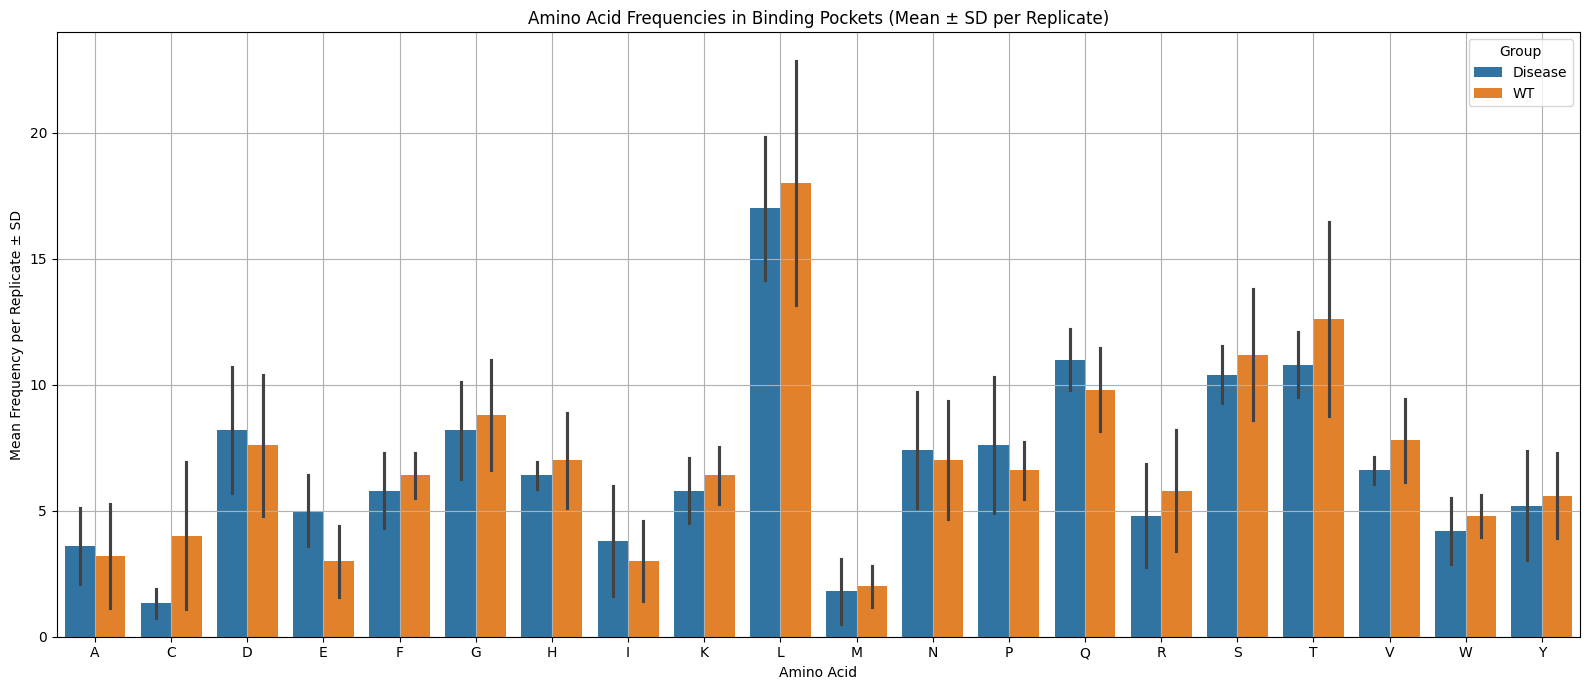

Amino Acid Frequency Statistical Test Results (Mann-Whitney U):
   AminoAcid   p-value  Significant
1          C  0.065096        False
3          E  0.101481        False
17         V  0.135099        False
13         Q  0.287333        False
4          F  0.408308        False
18         W  0.450644        False
16         T  0.461975        False
7          I  0.523217        False
14         R  0.524518        False
12         P  0.527089        False
8          K  0.591208        False
10         M  0.602195        False
2          D  0.674236        False
6          H  0.738190        False
5          G  0.751086        False
19         Y  0.915266        False
15         S  1.000000        False
11         N  1.000000        False
9          L  1.000000        False
0          A  1.000000        False


<ipython-input-1-97fac2e2f0df>:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=grouped, x='AminoAcid', y='Count', hue='Group', ci='sd', estimator=np.mean, errorbar='sd')


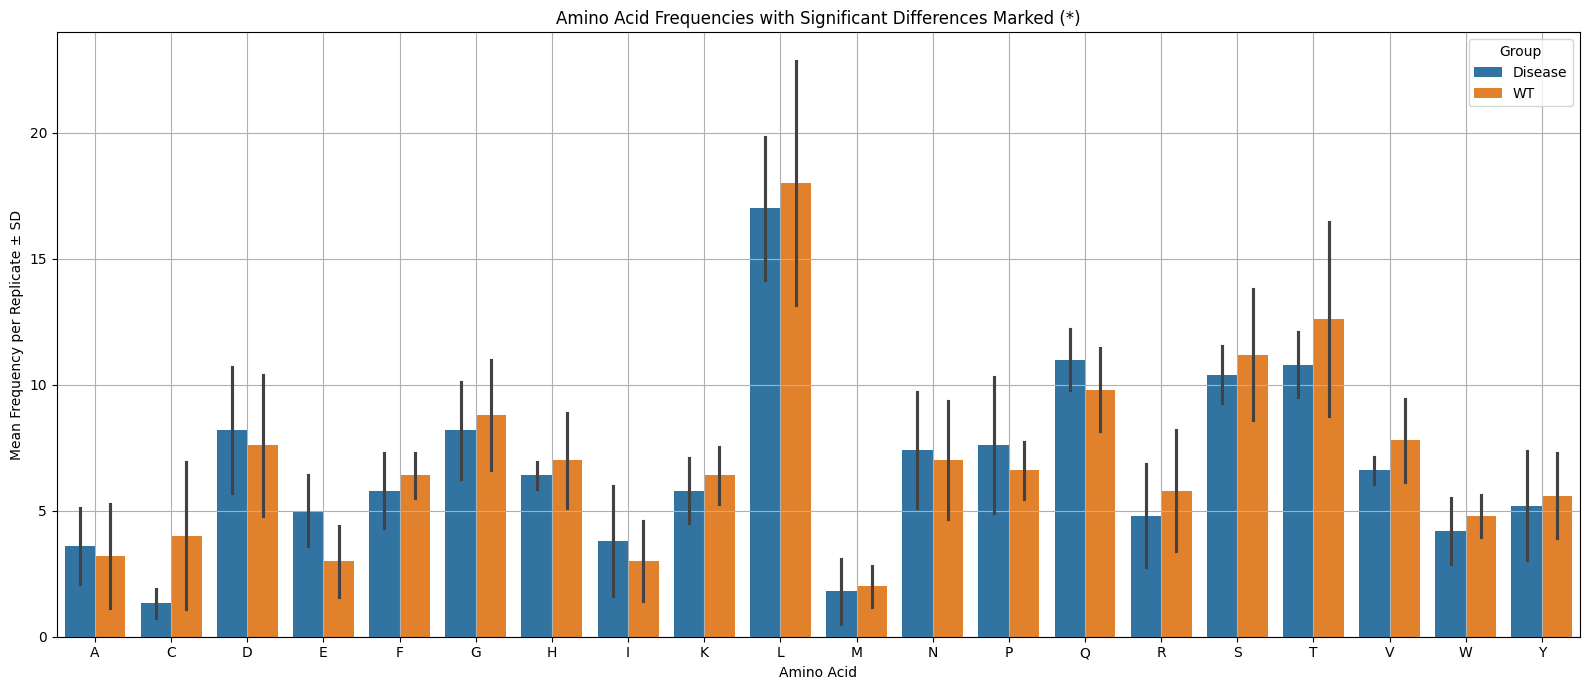

In [ ]:
import os
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Define folder path
folder_path = '/content/drive/MyDrive/CurPocket Data/'

# Function to parse amino acid residues from file
def parse_amino_acids(file_path, group, replicate):
    aa_data = []
    with open(file_path, 'r') as file:
        next(file)  # skip header
        for line in file:
            parts = line.strip().split(maxsplit=8)
            if len(parts) == 9:
                contact_residues = parts[8].split(',')
                for residue in contact_residues:
                    match = re.findall(r'\d+:([A-Z]):[A-Z]', residue)
                    if match:
                        aa_data.append({
                            'Group': group,
                            'Replicate': replicate,
                            'AminoAcid': match[0]
                        })
    return aa_data

# Parse all files in the folder
amino_acid_data = []
for file_path in glob.glob(folder_path + '*.txt'):
    file_name = os.path.basename(file_path)
    match = re.match(r'(Disease|WT)_(\d+)\.txt', file_name)
    if match:
        group, replicate = match.groups()
        amino_acid_data.extend(parse_amino_acids(file_path, group, int(replicate)))

# Convert to DataFrame
aa_df = pd.DataFrame(amino_acid_data)

# Group by amino acid per replicate to compute means and error bars
grouped = aa_df.groupby(['Group', 'Replicate', 'AminoAcid']).size().reset_index(name='Count')

# Plot barplot with error bars (± SD)
plt.figure(figsize=(16, 7))
sns.barplot(data=grouped, x='AminoAcid', y='Count', hue='Group', ci='sd', estimator=np.mean, errorbar='sd')
plt.title('Amino Acid Frequencies in Binding Pockets (Mean ± SD per Replicate)')
plt.xlabel('Amino Acid')
plt.ylabel('Mean Frequency per Replicate ± SD')
plt.legend(title='Group')
plt.grid(True)
plt.tight_layout()
plt.show()

# Statistical comparison (Mann-Whitney U Test)
stat_results = []
amino_acids = sorted(aa_df['AminoAcid'].unique())

for aa in amino_acids:
    group_disease = aa_df[(aa_df['Group'] == 'Disease') & (aa_df['AminoAcid'] == aa)]
    group_wt = aa_df[(aa_df['Group'] == 'WT') & (aa_df['AminoAcid'] == aa)]

    disease_counts = group_disease.groupby('Replicate').size()
    wt_counts = group_wt.groupby('Replicate').size()

    if len(disease_counts) > 1 and len(wt_counts) > 1:
        stat, p = mannwhitneyu(disease_counts, wt_counts, alternative='two-sided')
        stat_results.append({'AminoAcid': aa, 'p-value': p})

# Create DataFrame of statistical test results
results_df = pd.DataFrame(stat_results)
results_df['Significant'] = results_df['p-value'] < 0.05

# Display significant results
print("Amino Acid Frequency Statistical Test Results (Mann-Whitney U):")
print(results_df.sort_values('p-value'))

# Plot again with asterisk (*) on significant residues
significant_aa = results_df[results_df['Significant']]['AminoAcid'].tolist()
mean_counts = grouped.groupby(['Group', 'AminoAcid'])['Count'].mean().reset_index()

# Determine max y value for asterisk placement
y_max = grouped.groupby('AminoAcid')['Count'].max()

plt.figure(figsize=(16, 7))
ax = sns.barplot(data=grouped, x='AminoAcid', y='Count', hue='Group', ci='sd', estimator=np.mean, errorbar='sd')
plt.title('Amino Acid Frequencies with Significant Differences Marked (*)')
plt.xlabel('Amino Acid')
plt.ylabel('Mean Frequency per Replicate ± SD')
plt.legend(title='Group')
plt.grid(True)

# Add asterisks
for i, aa in enumerate(amino_acids):
    if aa in significant_aa:
        ymax = y_max.get(aa, 0)
        plt.text(i, ymax + 1, '*', ha='center', va='bottom', color='red', fontsize=16)

plt.tight_layout()
plt.show()